# Compute potential intensity

There is a package, installable via pip - but I found this to be quite finicky, so just load the source files locally instead.
```
conda create -n potint -y netcdf4 xarray=0.16.2 numpy numba ipykernel                           # don't add matplotlib after xarray - broke installation
conda activate potint
pip install tcpypi
```

Potential intensity for CMIP6 models can be calculated directly on JASMIN or the IPSL node

In [1]:
import xarray as xr, os, glob, re, numpy as np
from datetime import datetime
import warnings; warnings.filterwarnings("ignore", category = FutureWarning)

from tcpyPI.pi import pi
from xclim.core.units import convert_units_to
from  IPython.display import clear_output

fpath = "/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/tc-chido/"
xn,xx,yn,yx = [100,145,0,40]

In [2]:
def wrap_lon(ds):
    
    # method to wrap longitude from (0,360) to (-180,180)
    
    if "longitude" in ds.coords:
        lon = "longitude"
        lat = "latitude"
    elif "lon" in ds.coords:
        lon = "lon"
        lat = "lat"
    else: 
        # can only wrap longitude
        return ds
    
    if ds[lon].max() > 180:
        ds[lon] = (ds[lon].dims, (((ds[lon].values + 180) % 360) - 180), ds[lon].attrs)
        
    if lon in ds.dims:
        ds = ds.reindex({ lon : np.sort(ds[lon]) })
        ds = ds.reindex({ lat : np.sort(ds[lat]) })
    return ds

## ERA5

### Get monthly data from CDS

In [ ]:
import cdsapi

target = fpath+"era5_pi-sfc_monthly.nc"
dataset = "reanalysis-era5-single-levels-monthly-means"
request = {
    "product_type": ["monthly_averaged_reanalysis"],
    "variable": [
        "mean_sea_level_pressure",
        "sea_surface_temperature"
    ],
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980", "1981",
        "1982", "1983", "1984",
        "1985", "1986", "1987",
        "1988", "1989", "1990",
        "1991", "1992", "1993",
        "1994", "1995", "1996",
        "1997", "1998", "1999",
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007", "2008",
        "2009", "2010", "2011",
        "2012", "2013", "2014",
        "2015", "2016", "2017",
        "2018", "2019", "2020",
        "2021", "2022", "2023",
        "2024"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "time": ["00:00"],
    "data_format": "netcdf",
    "download_format": "unarchived",
    "area": [yx, xn, yn, xx]
}

client = cdsapi.Client()
client.retrieve(dataset, request, target).download()


2024-11-25 16:54:50,338 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-11-25 16:54:50,339 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2024-11-25 16:54:50,340 INFO [2024-09-16T00:00:00] Remember that you need to have an ECMWF account to use the new CDS. **Your old CDS credentials will not work in new CDS!**
2024-11-25 16:54:50,340 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using t

In [ ]:
import cdsapi

target = fpath+"era5_pi-plev_monthly.nc"
dataset = "reanalysis-era5-pressure-levels-monthly-means"
request = {
    "product_type": ["monthly_averaged_reanalysis"],
    "variable": [
        "specific_humidity",
        "temperature"
    ],
    "pressure_level": [
        "1", "2", "3",
        "5", "7", "10",
        "20", "30", "50",
        "70", "100", "125",
        "150", "175", "200",
        "225", "250", "300",
        "350", "400", "450",
        "500", "550", "600",
        "650", "700", "750",
        "775", "800", "825",
        "850", "875", "900",
        "925", "950", "975",
        "1000"
    ],
    "year": [
        "1940", "1941", "1942",
        "1943", "1944", "1945",
        "1946", "1947", "1948",
        "1949", "1950", "1951",
        "1952", "1953", "1954",
        "1955", "1956", "1957",
        "1958", "1959", "1960",
        "1961", "1962", "1963",
        "1964", "1965", "1966",
        "1967", "1968", "1969",
        "1970", "1971", "1972",
        "1973", "1974", "1975",
        "1976", "1977", "1978",
        "1979", "1980", "1981",
        "1982", "1983", "1984",
        "1985", "1986", "1987",
        "1988", "1989", "1990",
        "1991", "1992", "1993",
        "1994", "1995", "1996",
        "1997", "1998", "1999",
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007", "2008",
        "2009", "2010", "2011",
        "2012", "2013", "2014",
        "2015", "2016", "2017",
        "2018", "2019", "2020",
        "2021", "2022", "2023",
        "2024"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "time": ["00:00"],
    "data_format": "netcdf",
    "download_format": "unarchived",
    "area": [yx, xn, yn, xx]
}
client = cdsapi.Client()
client.retrieve(dataset, request, target).download()
clear_output(wait = False)
print("Done.")

### Get hourly data from CDS

In [3]:
import cdsapi, os

dataset = "reanalysis-era5-pressure-levels"
for y in [2024]:
    for m in [11]:
        
        target = fpath+"era5_pi-plev_"+str(y)+"-"+str(m).rjust(2,"0")+"_hourly.nc"
        print(target, os.path.exists(target))
        if os.path.exists(target): continue
        
        request = {
            "product_type": ["reanalysis"],
            "variable": [
                "specific_humidity",
                "temperature"
            ],
            "year": [str(y)],
            "month": [str(m)],
            "day": [
                "01", "02", "03",
                "04", "05", "06",
                "07", "08", "09",
                "10", "11", "12",
                "13", "14", "15",
                "16", "17", "18",
                "19", "20", "21",
                "22", "23", "24",
                "25", "26", "27",
                "28", "29", "30",
                "31"
            ],
            "time": [
                "00:00", "01:00", "02:00",
                "03:00", "04:00", "05:00",
                "06:00", "07:00", "08:00",
                "09:00", "10:00", "11:00",
                "12:00", "13:00", "14:00",
                "15:00", "16:00", "17:00",
                "18:00", "19:00", "20:00",
                "21:00", "22:00", "23:00"
            ],
            "pressure_level": [
                "1", "2", "3",
                "5", "7", "10",
                "20", "30", "50",
                "70", "100", "125",
                "150", "175", "200",
                "225", "250", "300",
                "350", "400", "450",
                "500", "550", "600",
                "650", "700", "750",
                "775", "800", "825",
                "850", "875", "900",
                "925", "950", "975",
                "1000"
            ],
            "data_format": "netcdf",
            "download_format": "unarchived",
            "area": [yx, xn, yn, xx]
        }

        client = cdsapi.Client()
        client.retrieve(dataset, request, target).download()
        clear_output(wait = False)
print("Done.")

In [ ]:
import cdsapi, os

dataset = "reanalysis-era5-single-levels"

for y in [2024]:
    for m in [11]:
        
        target = fpath+"era5_pi-sfc_"+str(y)+"-"+str(m).rjust(2,"0")+"_hourly.nc"
        print(target, os.path.exists(target))
        if os.path.exists(target): continue

        request = {
            "product_type": ["reanalysis"],
            "variable": [
                "mean_sea_level_pressure",
                "sea_surface_temperature"
            ],
            "year": [str(y)],
            "month": [str(m)],
            "day": [
                "01", "02", "03",
                "04", "05", "06",
                "07", "08", "09",
                "10", "11", "12",
                "13", "14", "15",
                "16", "17", "18",
                "19", "20", "21",
                "22", "23", "24",
                "25", "26", "27",
                "28", "29", "30",
                "31"
            ],
            "time": [
                "00:00", "01:00", "02:00",
                "03:00", "04:00", "05:00",
                "06:00", "07:00", "08:00",
                "09:00", "10:00", "11:00",
                "12:00", "13:00", "14:00",
                "15:00", "16:00", "17:00",
                "18:00", "19:00", "20:00",
                "21:00", "22:00", "23:00"
            ],
            "data_format": "netcdf",
            "download_format": "unarchived",
            "area": [yx, xn, yn, xx]
        }

        client = cdsapi.Client()
        client.retrieve(dataset, request, target).download()
        clear_output(wait = False)
print("Done.")

### Resample hourly data to daily

In [4]:
fl = glob.glob(fpath+"era5_*_hourly.nc")

for fnm in fl:
    
    new_fnm = re.sub("hourly", "daily", fnm)
    print(fnm.split("/")[-1])
    if os.path.exists(new_fnm): continue
    
    da = wrap_lon(xr.open_dataset(fnm).reset_coords(drop = True))
    da = da[[v for v in list(da.data_vars) if v in ["q","t","msl","sst"]]]
    da = da.resample(valid_time = "D").mean()
    da.to_netcdf(new_fnm)
    
clear_output(wait = False)
print("Done.")

Done.


## Hourly potential intensity

In [ ]:
plev = xr.open_mfdataset(fpath+"era5_pi-plev_2024-*_hourly.nc")[["q","t"]]
sfc = xr.open_mfdataset(fpath+"era5_pi-sfc_2024-*_hourly.nc").reset_coords(drop = True)

ds = xr.merge([plev, sfc])

In [ ]:
ds = ds.rename(pressure_level = "p", latitude = "lat", longitude = "lon", valid_time = "time")[["msl", "t", "q", "sst"]]

ds["msl"] = convert_units_to(ds.msl, "hPa")
ds["sst"] = convert_units_to(ds.sst, "degC")
ds["t"] = convert_units_to(ds.t, "degC")
ds["q"] = convert_units_to(ds.q, "g kg-1")
ds["p"] = convert_units_to(ds.p, "hPa")

In [ ]:
for d in sorted(list(set(ds.time.dt.strftime("%Y-%m-%d").values))):
    
    new_fnm = fpath+"pi-hourly/pi_era5_hourly_"+d+".nc"
    print(new_fnm)
    if os.path.exists(new_fnm): continue
    
    da = ds.sel(time = d)
    
    # calculate the potential intensity
    vmax, pmin, ifl, t0, otl = xr.apply_ufunc(
        pi,
        ds['sst'], ds['msl'], ds['p'], ds['t'], ds['q'],
        kwargs=dict(CKCD=0.9, ascent_flag=0, diss_flag=1, ptop=50, miss_handle=1),  # used default value of CKCD = 0.9
        input_core_dims=[
            [], [], ['p', ], ['p', ], ['p', ],
        ],
        output_core_dims=[
            [], [], [], [], []
        ],
        vectorize=True, dask = "parallelized"
    )
    vmax.to_netcdf(new_fnm)
clear_output(wait = False)
print("Done.")

## Daily potential intensity

In [10]:
ds = xr.merge([xr.open_mfdataset(fpath+"era5_pi-plev_*daily.nc"), 
               xr.open_mfdataset(fpath+"era5_pi-sfc_*daily.nc")])

ds = ds.rename(pressure_level = "p", latitude = "lat", longitude = "lon", valid_time = "time")[["msl", "t", "q", "sst"]]

ds["msl"] = convert_units_to(ds.msl, "hPa")
ds["sst"] = convert_units_to(ds.sst, "degC")
ds["t"] = convert_units_to(ds.t, "degC")
ds["q"] = convert_units_to(ds.q, "g kg-1")
ds["p"] = convert_units_to(ds.p, "hPa")

ds.to_netcdf(fpath+"pi-vars_era5_daily.nc")

In [12]:
xr.open_dataset(fpath+"era5_pi-plev_2024-11_daily.nc")

<xarray.Dataset>
Dimensions:         (valid_time: 27, pressure_level: 37, latitude: 161,
                     longitude: 181)
Coordinates:
  * pressure_level  (pressure_level) float64 1e+03 975.0 950.0 ... 3.0 2.0 1.0
  * latitude        (latitude) float64 40.0 39.75 39.5 39.25 ... 0.5 0.25 0.0
  * longitude       (longitude) float64 100.0 100.2 100.5 ... 144.5 144.8 145.0
  * valid_time      (valid_time) datetime64[ns] 2024-11-01 ... 2024-11-27
Data variables:
    q               (valid_time, pressure_level, latitude, longitude) float32 ...
    t               (valid_time, pressure_level, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-02T14:58 GRIB to CDM+CF via cfgrib-0.9.1...

In [24]:
# start by extracting single days of data
for d in sorted(list(set(ds.time.dt.strftime("%Y-%m-%d").values))):
    
    new_fnm = fpath+"pi-hourly/pi-vars_era5_hourly_"+d+".nc"
    print(new_fnm)
    if os.path.exists(new_fnm): continue
    
    ds.sel(time = d).to_netcdf(new_fnm)

In [24]:
# then compute the PI (otherwise large file size slows everything down)
for fnm in glob.glob(fpath+"pi-hourly/pi-vars_*.nc"):
    
    new_fnm = re.sub("pi-vars", "pi", fnm)
    if os.path.exists(new_fnm): continue
        
    ds = xr.open_dataset(fnm)
    # calculate the potential intensity
    vmax, pmin, ifl, t0, otl = xr.apply_ufunc(
        pi,
        ds['sst'], ds['msl'], ds['p'], ds['t'], ds['q'],
        kwargs=dict(CKCD=0.9, ascent_flag=0, diss_flag=1, ptop=50, miss_handle=1),  # used default value of CKCD = 0.9
        input_core_dims=[
            [], [], ['p', ], ['p', ], ['p', ],
        ],
        output_core_dims=[
            [], [], [], [], []
        ],
        vectorize=True
    )
    vmax.to_netcdf(new_fnm)
clear_output(wait = False)
print("Done.")

## Monthly potential intensity from daily data

In [12]:
ds = xr.merge([xr.concat([wrap_lon(xr.open_dataset(fnm)) for fnm in glob.glob(fpath+"era5_pi-plev_*daily.nc")], "valid_time"), 
               xr.concat([wrap_lon(xr.open_dataset(fnm)) for fnm in glob.glob(fpath+"era5_pi-sfc_*daily.nc")], "valid_time")]).resample(valid_time = "MS").mean().load()

ds = ds.rename(pressure_level = "p", latitude = "lat", longitude = "lon", valid_time = "time")[["msl", "t", "q", "sst"]]

ds["msl"] = convert_units_to(ds.msl, "hPa")
ds["sst"] = convert_units_to(ds.sst, "degC")
ds["t"] = convert_units_to(ds.t, "degC")
ds["q"] = convert_units_to(ds.q, "g kg-1")
ds["p"] = convert_units_to(ds.p, "hPa")

# calculate the potential intensity
vmax, pmin, ifl, t0, otl = xr.apply_ufunc(
    pi,
    ds['sst'], ds['msl'], ds['p'], ds['t'], ds['q'],
    kwargs=dict(CKCD=0.9, ascent_flag=0, diss_flag=1, ptop=50, miss_handle=1),  # used default value of CKCD = 0.9
    input_core_dims=[
        [], [], ['p', ], ['p', ], ['p', ],
    ],
    output_core_dims=[
        [], [], [], [], []
    ],
    vectorize=True
)

In [13]:
vmax.to_netcdf("/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/pi_philippines/pi_era5_monthly-from-hourly.nc")

## Monthly potential intensity

In [2]:
plev = xr.open_mfdataset(fpath+"era5_pi-plev_monthly.nc")[["q","t"]]
sfc = xr.open_mfdataset(fpath+"era5_pi-sfc_monthly.nc").reset_coords(drop = True)

ds = xr.merge([plev, sfc])

In [5]:
ds = ds.rename(pressure_level = "p", latitude = "lat", longitude = "lon", date = "time")[["msl", "t", "q", "sst"]]

ds["msl"] = convert_units_to(ds.msl, "hPa")
ds["sst"] = convert_units_to(ds.sst, "degC")
ds["t"] = convert_units_to(ds.t, "degC")
ds["q"] = convert_units_to(ds.q, "g kg-1")
ds["p"] = convert_units_to(ds.p, "hPa")

# fix integer datestrings
ds = ds.assign_coords(time = [datetime(int(str(d)[:4]), int(str(d)[4:6]), int(str(d)[6:])) for d in ds.time.values])

In [22]:
# start by extracting single days of data
for y in sorted(list(set(ds.time.dt.strftime("%Y").values))):
    
    new_fnm = fpath+"pi-monthly/pi-vars_era5_monthly_"+str(y)+".nc"
    print(new_fnm)
    if os.path.exists(new_fnm): continue
    
    ds.sel(time = str(y)).to_netcdf(new_fnm)
clear_output(wait = False)

/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/pi_philippines/pi-monthly/pi-vars_era5_monthly_1940.nc
/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/pi_philippines/pi-monthly/pi-vars_era5_monthly_1941.nc
/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/pi_philippines/pi-monthly/pi-vars_era5_monthly_1942.nc
/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/pi_philippines/pi-monthly/pi-vars_era5_monthly_1943.nc
/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/pi_philippines/pi-monthly/pi-vars_era5_monthly_1944.nc
/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/pi_philippines/pi-monthly/pi-vars_era5_monthly_1945.nc
/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/pi_philippines/pi-monthly/pi-vars_era5_monthly_1946.nc
/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/pi_philippines/pi-monthly/pi-vars_era5_monthly_1947.nc
/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/pi

In [27]:
# then compute the PI (otherwise large file size slows everything down)
for fnm in glob.glob(fpath+"pi-monthly/pi-vars_*.nc"):
    
    print(fnm)
    new_fnm = re.sub("pi-vars", "pi", fnm)
    if os.path.exists(new_fnm): continue
        
    ds = xr.open_dataset(fnm)
    # calculate the potential intensity
    vmax, pmin, ifl, t0, otl = xr.apply_ufunc(
        pi,
        ds['sst'], ds['msl'], ds['p'], ds['t'], ds['q'],
        kwargs=dict(CKCD=0.9, ascent_flag=0, diss_flag=1, ptop=50, miss_handle=1),  # used default value of CKCD = 0.9
        input_core_dims=[
            [], [], ['p', ], ['p', ], ['p', ],
        ],
        output_core_dims=[
            [], [], [], [], []
        ],
        vectorize=True
    )
    vmax.to_netcdf(new_fnm)
clear_output(wait = False)
print("Done.")

Done.


# MERRA-2 (2024 only)

In [49]:
ds = xr.merge([xr.open_mfdataset("/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/pi_philippines/merra2_2024/*"+domain+"*") for domain in ["Nx", "Np"]]).load()

ds = ds.rename(lev = "p", QV = "q", T = "t", TS = "sst", SLP = "msl")        
ds["msl"] = convert_units_to(ds.msl, "hPa")
ds["sst"] = convert_units_to(ds.sst, "degC")
ds["t"] = convert_units_to(ds.t, "degC")
ds["q"] = convert_units_to(ds.q, "g kg-1")
ds["p"] = convert_units_to(ds.p, "hPa")

In [50]:
# calculate the potential intensity
vmax, pmin, ifl, t0, otl = xr.apply_ufunc(
    pi,
    ds['sst'], ds['msl'], ds['p'], ds['t'], ds['q'],
    kwargs=dict(CKCD=0.9, ascent_flag=0, diss_flag=1, ptop=50, miss_handle=1),  # used default value of CKCD = 0.9
    input_core_dims=[
        [], [], ['p', ], ['p', ], ['p', ],
    ],
    output_core_dims=[
        [], [], [], [], []
    ],
    vectorize=True
)
vmax.to_netcdf("/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/pi_philippines/pi_merra2_monthly_2024.nc")

In [51]:
ds = xr.open_dataset("/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/pi_philippines/pi_merra2_monthly_2024.nc")

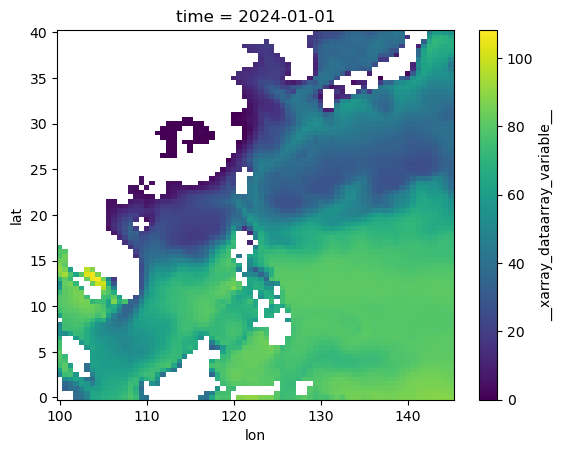

In [56]:
ds["__xarray_dataarray_variable__"].isel(time = 0).plot()